# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [9]:
df_regions = pd.read_csv('data/regions.csv', encoding='utf8')
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
ID              85 non-null int64
Region_name     85 non-null object
Region_class    85 non-null object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [10]:
df_regions.head()

,ID,Region_name,Region_class
0,10,Московская область,1A
1,18,Москва,1A
2,29,Санкт-Петербург,1A
3,32,Краснодарский край,1A
4,1,Белгородская область,2A


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [12]:
df = df_test.append(df_train).reset_index(drop=True)

In [13]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Страхование', 'Ресторанный бизнес/Общественное питание', 'Строительство', 'Туризм', 'Другие сферы', 'Информационные технологии', 'Сборочные производства', 'Наука', 'Информационные услуги', 'Государственная служба', 'Торговля', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Образование', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Маркетинг', 'Подбор персонала', 'Банк/Финансы', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Здравоохранение', 'Энергетика', 'Логистика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')


In [17]:
df['CREDIT']=df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')


In [18]:
df['FST_PAYMENT']=df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')


In [19]:
df['LOAN_AVG_DLQ_AMT']=df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')


In [20]:
df['LOAN_MAX_DLQ_AMT']=df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')


In [21]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Страхование', 'Ресторанный бизнес/Общественное питание', 'Строительство', 'Туризм', 'Другие сферы', 'Информационные технологии', 'Сборочные производства', 'Наука', 'Информационные услуги', 'Торговля', 'Государственная служба', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Образование', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Подбор персонала', 'Банк/Финансы', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Здравоохранение', 'Энергетика', 'Логистика'}


GEN_TITLE


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [23]:
#для начала выделим отдельный массив для экспериментов над данными, чтобы всегда можно было вернуться к этой точке
newdf=df

In [24]:
#посмотрим, насколько зависят данные от рабочего статуса. мы тут узнали важную вещт - индустрии и рабочие звания есть у работающих и пенсионеров
df[df.SOCSTATUS_WORK_FL==0]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0.00,0.00,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0.00,0.00,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0.00,0.00,NaN,test
12,59912574,0,59,0,1,1,0,0,Неполное среднее,Не состоял в браке,...,0,2,2,6,0,0,0.00,0.00,NaN,test
20,59913432,0,65,0,1,1,2,0,Среднее специальное,Разведен(а),...,0,1,1,6,0,0,0.00,0.00,NaN,test
28,59914189,0,63,0,1,0,0,0,Среднее специальное,Состою в браке,...,0,1,1,3,0,0,0.00,0.00,NaN,test
30,59914517,0,63,0,1,1,2,0,Среднее специальное,Не состоял в браке,...,0,1,1,3,0,0,0.00,0.00,NaN,test
57,59918446,0,62,0,1,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,6,0,0,0.00,0.00,NaN,test
77,59920591,0,58,0,1,1,2,0,Среднее специальное,Вдовец/Вдова,...,0,1,1,4,0,0,0.00,0.00,NaN,test
96,59923652,0,66,0,1,1,0,0,Неполное среднее,Состою в браке,...,0,1,1,4,0,0,0.00,0.00,NaN,test


In [25]:
#индустрии - это невнятная история, тут непонятно, имеет ли смысл брать часто встречающуюся. Проще завести категорию Неизвестно
newdf.GEN_INDUSTRY[df.GEN_INDUSTRY.isnull()] = 'Unknown'
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#а вот должность - другое дело, тут можно взять самую распространенную
newdf['GEN_TITLE'].value_counts()

Специалист                        13981
Рабочий                            6025
Служащий                           1743
Руководитель среднего звена        1396
Работник сферы услуг               1118
Высококвалифиц. специалист         1082
Руководитель высшего звена          841
Индивидуальный предприниматель      436
Другое                              355
Руководитель низшего звена          268
Военнослужащий по контракту         158
Партнер                              17
Name: GEN_TITLE, dtype: int64

In [27]:
newdf.GEN_TITLE[df.GEN_TITLE.isnull()] = 'Специалист'
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
newdf['GEN_TITLE'].value_counts()

Специалист                        16694
Рабочий                            6025
Служащий                           1743
Руководитель среднего звена        1396
Работник сферы услуг               1118
Высококвалифиц. специалист         1082
Руководитель высшего звена          841
Индивидуальный предприниматель      436
Другое                              355
Руководитель низшего звена          268
Военнослужащий по контракту         158
Партнер                              17
Name: GEN_TITLE, dtype: int64

In [29]:
#с орг типом компании тоже не все ясно. Она может быть как частная, так и госудерственная. 
#Вводить неизвестную переменную не хочется, все таки это тип компании, но я бы предположила, что если бы это был гос служащий, про него было бы больше данных.
#поэтому больше вероятность, что неизвестно - про частную компанию
newdf['ORG_TP_STATE'].value_counts()



Частная компания                  12896
Государственная комп./учреж.      12152
Индивидуальный предприниматель     1882
Некоммерческая организация          445
Частная ком. с инос. капиталом       45
Name: ORG_TP_STATE, dtype: int64

In [30]:
newdf.ORG_TP_STATE[df.ORG_TP_STATE.isnull()] = 'Частная компания'
newdf['ORG_TP_STATE'].value_counts()
newdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#тут логично везде проставить без участия
newdf['ORG_TP_FCAPITAL'].value_counts()


Без участия    27099
С участием       326
Name: ORG_TP_FCAPITAL, dtype: int64

In [32]:
newdf.ORG_TP_FCAPITAL[df.ORG_TP_FCAPITAL.isnull()] = 'Без участия'
newdf['ORG_TP_FCAPITAL'].value_counts()
newdf.info()



C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [33]:
newdf['JOB_DIR'].value_counts()

Участие в основ. деятельности    22613
Вспомогательный техперсонал       2091
Бухгалтерия, финансы, планир.      957
Адм-хоз. и трансп. службы          539
Снабжение и сбыт                   433
Служба безопасности                318
Кадровая служба и секретариат      201
Пр-техн. обесп. и телеком.         145
Юридическая служба                 101
Реклама и маркетинг                 22
Name: JOB_DIR, dtype: int64

In [34]:
newdf.JOB_DIR[df.JOB_DIR.isnull()] = 'Участие в основ. деятельности'
newdf['JOB_DIR'].value_counts()

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Участие в основ. деятельности    25326
Вспомогательный техперсонал       2091
Бухгалтерия, финансы, планир.      957
Адм-хоз. и трансп. службы          539
Снабжение и сбыт                   433
Служба безопасности                318
Кадровая служба и секретариат      201
Пр-техн. обесп. и телеком.         145
Юридическая служба                 101
Реклама и маркетинг                 22
Name: JOB_DIR, dtype: int64

In [35]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [36]:
#когда дело дошло до регионов - мы заменяем их на коды их благополучности, а там, где пропуски - ставим самый распространенный
newdf['TP_PROVINCE'].value_counts()

Краснодарский край         1537
Кемеровская область        1283
Алтайский край              863
Ставропольский край         842
Читинская область           821
Ростовская область          788
Приморский край             786
Челябинская область         712
Кировская область           689
Свердловская область        683
Саратовская область         635
Вологодская область         625
Волгоградская область       624
Воронежская область         582
Красноярский край           576
Омская область              544
Татарстан                   526
Тульская область            507
Оренбургская область        500
Хабаровский край            492
Санкт-Петербург             489
Новосибирская область       477
Самарская область           470
Архангельская область       470
Амурская область            432
Курская область             420
Иркутская область           419
Белгородская область        412
Ярославская область         407
Бурятия                     390
                           ... 
Ханты-Ма

In [37]:
df_regions['Region_name'].value_counts()

Удмуртская Республика              1
Московская область                 1
Омская область                     1
Оренбургская область               1
Краснодарский край                 1
Республика Хакасия                 1
Забайкальский край                 1
Амурская область                   1
Чукотский авт.округ                1
Брянская область                   1
Новосибирская область              1
Смоленская область                 1
Ленинградская область              1
Самарская область                  1
Санкт-Петербург                    1
Томская область                    1
Республика Мордовия                1
Челябинская область                1
Республика Марий Эл                1
Псковская область                  1
Ямало-Ненецкий АО                  1
Алтайский край                     1
Республика Карелия                 1
Ханты-Мансийский АО                1
Республика Дагестан                1
Иркутская область                  1
Ростовская область                 1
Т

In [38]:
newdf['TP_PROVINCE_CLASS'] = newdf['TP_PROVINCE'].map(df_regions.set_index('Region_name')['Region_class'])

In [39]:
newdf[['TP_PROVINCE','TP_PROVINCE_CLASS']]

,TP_PROVINCE,TP_PROVINCE_CLASS
0,Красноярский край,2B
1,Орловская область,3B2
2,Коми,NaN
3,Читинская область,NaN
4,Хабаровский край,3B1
5,Кировская область,3B1
6,Курганская область,3B2
7,Томская область,3B1
8,Омская область,3B1
9,Оренбургская область,3B1


In [40]:
newdf.TP_PROVINCE_CLASS[newdf.TP_PROVINCE_CLASS.isnull()] = '3B1'

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
newdf['TP_PROVINCE_CLASS'].value_counts()

3B1    16102
2A      6311
2B      3790
1A      2069
3B2     1861
Name: TP_PROVINCE_CLASS, dtype: int64

In [42]:
newdf = newdf.drop(['TP_PROVINCE'], axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [43]:
newdf['REG_ADDRESS_PROVINCE_CLASS'] = newdf['REG_ADDRESS_PROVINCE'].map(df_regions.set_index('Region_name')['Region_class'])


In [44]:

newdf.REG_ADDRESS_PROVINCE_CLASS[newdf.REG_ADDRESS_PROVINCE_CLASS.isnull()] = '3B1'
newdf['REG_ADDRESS_PROVINCE_CLASS'].value_counts()

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3B1    16190
2A      6734
2B      3430
1A      1974
3B2     1805
Name: REG_ADDRESS_PROVINCE_CLASS, dtype: int64

In [45]:
newdf = newdf.drop(['REG_ADDRESS_PROVINCE'], axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
FACT_ADDRESS_P

In [46]:
newdf['FACT_ADDRESS_PROVINCE_CLASS'] = newdf['FACT_ADDRESS_PROVINCE'].map(df_regions.set_index('Region_name')['Region_class'])

newdf.FACT_ADDRESS_PROVINCE_CLASS[newdf.FACT_ADDRESS_PROVINCE_CLASS.isnull()] = '3B1'
newdf['FACT_ADDRESS_PROVINCE_CLASS'].value_counts()

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3B1    16078
2A      6672
2B      3432
1A      2166
3B2     1785
Name: FACT_ADDRESS_PROVINCE_CLASS, dtype: int64

In [47]:
newdf = newdf.drop(['FACT_ADDRESS_PROVINCE'], axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                   30133 non-null int64
TARGET                         30133 non-null int64
AGE                            30133 non-null int64
SOCSTATUS_WORK_FL              30133 non-null int64
SOCSTATUS_PENS_FL              30133 non-null int64
GENDER                         30133 non-null int64
CHILD_TOTAL                    30133 non-null int64
DEPENDANTS                     30133 non-null int64
EDUCATION                      30133 non-null object
MARITAL_STATUS                 30133 non-null object
GEN_INDUSTRY                   30133 non-null object
GEN_TITLE                      30133 non-null object
ORG_TP_STATE                   30133 non-null object
ORG_TP_FCAPITAL                30133 non-null object
JOB_DIR                        30133 non-null object
FAMILY_INCOME                  30133 non-null object
PERSONAL_INCOME                30133 non-null float

In [48]:
newdf['POSTAL_ADDRESS_PROVINCE_CLASS'] = newdf['POSTAL_ADDRESS_PROVINCE'].map(df_regions.set_index('Region_name')['Region_class'])

newdf.POSTAL_ADDRESS_PROVINCE_CLASS[newdf.POSTAL_ADDRESS_PROVINCE_CLASS.isnull()] = '3B1'
newdf['POSTAL_ADDRESS_PROVINCE'].value_counts()

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Краснодарский край             1311
Кемеровская область            1296
Алтайский край                  890
Читинская область               845
Приморский край                 786
Ростовская область              776
Свердловская область            700
Саратовская область             646
Вологодская область             631
Волгоградская область           612
Челябинская область             592
Воронежская область             569
Татарстан                       550
Кировская область               547
Омская область                  546
Тульская область                513
Оренбургская область            502
Архангельская область           487
Хабаровский край                484
Самарская область               474
Красноярский край               462
Башкирия                        456
Новосибирская область           440
Белгородская область            421
Иркутская область               417
Курская область                 417
Тюменская область               412
Московская область          

In [49]:
newdf = newdf.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                     30133 non-null int64
TARGET                           30133 non-null int64
AGE                              30133 non-null int64
SOCSTATUS_WORK_FL                30133 non-null int64
SOCSTATUS_PENS_FL                30133 non-null int64
GENDER                           30133 non-null int64
CHILD_TOTAL                      30133 non-null int64
DEPENDANTS                       30133 non-null int64
EDUCATION                        30133 non-null object
MARITAL_STATUS                   30133 non-null object
GEN_INDUSTRY                     30133 non-null object
GEN_TITLE                        30133 non-null object
ORG_TP_STATE                     30133 non-null object
ORG_TP_FCAPITAL                  30133 non-null object
JOB_DIR                          30133 non-null object
FAMILY_INCOME                    30133 non-null object
PERSONAL_INCOME    

In [50]:
for i in newdf.columns: # перебираем все столбцы
    if str(newdf[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(newdf[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{'Страхование', 'Ресторанный бизнес/Общественное питание', 'Строительство', 'Туризм', 'Другие сферы', 'Информационные технологии', 'Сборочные производства', 'Наука', 'Информационные услуги', 'Торговля', 'Государственная служба', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Unknown', 'Образование', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Подбор персонала', 'Банк/Финансы', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Здравоохранение', 'Энергетика', 'Логистика'}


GEN_

In [51]:
newdf = newdf.drop(['AGREEMENT_RK'], axis=1)

In [52]:

newdf.WORK_TIME[newdf.WORK_TIME.isnull()] = newdf['WORK_TIME'].median()
newdf['WORK_TIME'].value_counts()

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


48.0       4322
36.0       2436
24.0       2307
60.0       1894
12.0       1696
72.0       1078
120.0      1063
6.0         911
18.0        827
84.0        826
96.0        773
180.0       617
108.0       552
240.0       434
144.0       396
8.0         376
30.0        372
156.0       327
132.0       324
192.0       281
7.0         279
204.0       274
3.0         262
168.0       259
360.0       243
216.0       232
10.0        225
4.0         224
300.0       220
9.0         204
           ... 
3500.0        1
202.0         1
378.0         1
780.0         1
1254.0        1
1728.0        1
232.0         1
265.0         1
1800.0        1
251.0         1
159.0         1
443.0         1
457.0         1
463.0         1
275.0         1
343.0         1
414.0         1
10000.0       1
1120.0        1
127.0         1
560.0         1
337.0         1
458.0         1
350.0         1
519.0         1
201.0         1
391.0         1
398.0         1
117.0         1
469.0         1
Name: WORK_TIME, Length:

In [53]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                           30133 non-null int64
AGE                              30133 non-null int64
SOCSTATUS_WORK_FL                30133 non-null int64
SOCSTATUS_PENS_FL                30133 non-null int64
GENDER                           30133 non-null int64
CHILD_TOTAL                      30133 non-null int64
DEPENDANTS                       30133 non-null int64
EDUCATION                        30133 non-null object
MARITAL_STATUS                   30133 non-null object
GEN_INDUSTRY                     30133 non-null object
GEN_TITLE                        30133 non-null object
ORG_TP_STATE                     30133 non-null object
ORG_TP_FCAPITAL                  30133 non-null object
JOB_DIR                          30133 non-null object
FAMILY_INCOME                    30133 non-null object
PERSONAL_INCOME                  30133 non-null float64
REGION_NM        

In [54]:
newdf['PREVIOUS_CARD_NUM_UTILIZED'].value_counts()

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

In [55]:
#поскольку это количество карт, логично, что там, где нет данных, должны быть нули
newdf.PREVIOUS_CARD_NUM_UTILIZED[newdf.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = 0

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                           30133 non-null int64
AGE                              30133 non-null int64
SOCSTATUS_WORK_FL                30133 non-null int64
SOCSTATUS_PENS_FL                30133 non-null int64
GENDER                           30133 non-null int64
CHILD_TOTAL                      30133 non-null int64
DEPENDANTS                       30133 non-null int64
EDUCATION                        30133 non-null object
MARITAL_STATUS                   30133 non-null object
GEN_INDUSTRY                     30133 non-null object
GEN_TITLE                        30133 non-null object
ORG_TP_STATE                     30133 non-null object
ORG_TP_FCAPITAL                  30133 non-null object
JOB_DIR                          30133 non-null object
FAMILY_INCOME                    30133 non-null object
PERSONAL_INCOME                  30133 non-null float64
REGION_NM        

In [57]:
newdf=pd.get_dummies(newdf)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 149 entries, TARGET to POSTAL_ADDRESS_PROVINCE_CLASS_3B2
dtypes: float64(7), int64(31), uint8(111)
memory usage: 11.9 MB


In [58]:
list(newdf)

['TARGET',
 'AGE',
 'SOCSTATUS_WORK_FL',
 'SOCSTATUS_PENS_FL',
 'GENDER',
 'CHILD_TOTAL',
 'DEPENDANTS',
 'PERSONAL_INCOME',
 'REG_FACT_FL',
 'FACT_POST_FL',
 'REG_POST_FL',
 'REG_FACT_POST_FL',
 'REG_FACT_POST_TP_FL',
 'FL_PRESENCE_FL',
 'OWN_AUTO',
 'AUTO_RUS_FL',
 'HS_PRESENCE_FL',
 'COT_PRESENCE_FL',
 'GAR_PRESENCE_FL',
 'LAND_PRESENCE_FL',
 'CREDIT',
 'TERM',
 'FST_PAYMENT',
 'DL_DOCUMENT_FL',
 'GPF_DOCUMENT_FL',
 'FACT_LIVING_TERM',
 'WORK_TIME',
 'FACT_PHONE_FL',
 'REG_PHONE_FL',
 'GEN_PHONE_FL',
 'LOAN_NUM_TOTAL',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_PAYM',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_MAX_DLQ_AMT',
 'PREVIOUS_CARD_NUM_UTILIZED',
 'EDUCATION_Высшее',
 'EDUCATION_Два и более высших образования',
 'EDUCATION_Неоконченное высшее',
 'EDUCATION_Неполное среднее',
 'EDUCATION_Среднее',
 'EDUCATION_Среднее специальное',
 'EDUCATION_Ученая степень',
 'MARITAL_STATUS_Вдовец/Вдова',
 'MARITAL_STATUS_Гражданский брак',
 'MARITAL_STATUS_Не состоял в браке',
 'MAR

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [59]:
#см выше, сначала начала писать, а потом уже тут прочитала

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [60]:
#см выше

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [61]:
#не написала функцию, потому что времени не хватило, я сначала сделала предобработку всю, а потом до этого дошла, временеи переделывать не было

def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    return df_output

In [62]:
#df_preproc = df.pipe(preproc_data)

df_train_preproc = newdf.query('sample_train == "1"').drop(['sample_train'], axis=1)
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 148 entries, TARGET to POSTAL_ADDRESS_PROVINCE_CLASS_3B2
dtypes: float64(7), int64(31), uint8(110)
memory usage: 6.1 MB


In [63]:

df_test_preproc = newdf.query('sample_test == "1"').drop(['sample_test'], axis=1)
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 148 entries, TARGET to POSTAL_ADDRESS_PROVINCE_CLASS_3B2
dtypes: float64(7), int64(31), uint8(110)
memory usage: 6.0 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [64]:
y_test=df_test_preproc['TARGET']

In [65]:
y_test

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        1
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
14880    0
14881    0
14882    0
14883    0
14884    0
14885    0
14886    0
14887    0
14888    1
14889    0
14890    0
14891    0
14892    0
14893    0
14894    0
14895    0
14896    0
14897    0
14898    0
14899    0
14900    0
14901    0
14902    0
14903    0
14904    0
14905    0
14906    1
14907    0
14908    0
14909    0
Name: TARGET, Length: 14910, dtype: int64

In [69]:
x_test=df_test_preproc.drop(['TARGET'],axis=1)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 147 entries, AGE to POSTAL_ADDRESS_PROVINCE_CLASS_3B2
dtypes: float64(7), int64(30), uint8(110)
memory usage: 6.5 MB


In [70]:
y=df_train_preproc['TARGET']
x=df_train_preproc.drop(['TARGET'],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 147 entries, AGE to POSTAL_ADDRESS_PROVINCE_CLASS_3B2
dtypes: float64(7), int64(30), uint8(110)
memory usage: 6.0 MB


In [72]:
y

14910    0
14911    0
14912    0
14913    0
14914    0
14915    0
14916    0
14917    0
14918    0
14919    0
14920    0
14921    1
14922    1
14923    0
14924    0
14925    1
14926    0
14927    0
14928    1
14929    0
14930    0
14931    0
14932    0
14933    0
14934    0
14935    0
14936    0
14937    1
14938    0
14939    0
        ..
30103    0
30104    0
30105    0
30106    0
30107    0
30108    0
30109    0
30110    1
30111    0
30112    0
30113    0
30114    1
30115    0
30116    0
30117    0
30118    0
30119    1
30120    0
30121    0
30122    0
30123    1
30124    0
30125    0
30126    0
30127    0
30128    0
30129    0
30130    0
30131    0
30132    0
Name: TARGET, Length: 15223, dtype: int64

#### Задание 5. Обучение и оценка качества разных моделей

In [ ]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

#X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [73]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [74]:
rfc=RandomForestClassifier(n_estimators=10000)

In [75]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
predict_rfc=rfc.predict_proba(x_test)

(-0.01, 1.01)

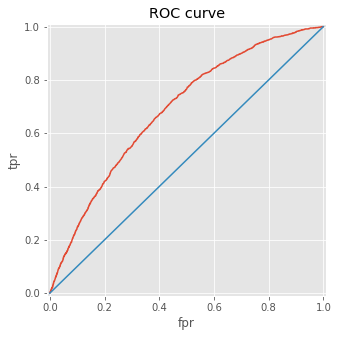

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_rfc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [78]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    


In [81]:
#rfc
accuracy_score(y_test,predict_rfc)


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [83]:
precision_score(y_test, predict_rfc)


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
recall_score(y_test, predict_rfc)

In [84]:
dtc=DecisionTreeClassifier()

In [85]:
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
predict_dtc=dtc.predict_proba(x_test)

(-0.01, 1.01)

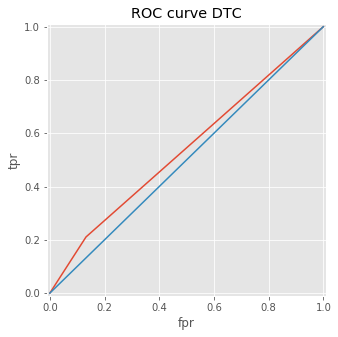

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_dtc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve DTC')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [88]:
lrs=LogisticRegression()

In [89]:
lrs.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predict_lrs=lrs.predict(x_test)

In [96]:
recall_score(y_test, predict_lrs)

0.005142857142857143

In [97]:
precision_score(y_test, predict_lrs)


0.2571428571428571

In [98]:
accuracy_score(y_test,predict_lrs)

0.8814889336016096

(-0.01, 1.01)

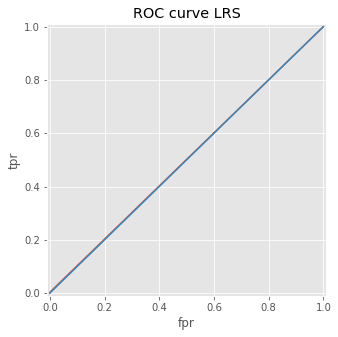

In [93]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_lrs)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve LRS')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте
